# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  Strong correlation between latitute/longitude and temperature
2.  No other strong correlations were noticed
3.  Wind speed and latitude do not have a large correlation 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key_dif
# from api_keys import g_key
# from api_keys import try_please
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# print(weather_api_key_dif)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)
print(lat_lngs)

['qaanaaq', 'port alfred', 'georgetown', 'rikitea', 'zafra', 'santa cruz', 'albany', 'san vicente', 'youghal', 'dengzhou', 'nguiu', 'avarua', 'busselton', 'cherskiy', 'barrow', 'saint-augustin', 'gorontalo', 'bluff', 'akdepe', 'angoche', 'sivagiri', 'yellowknife', 'bethel', 'punta arenas', 'nantucket', 'hobart', 'bredasdorp', 'egvekinot', 'morogoro', 'solnechnyy', 'jamestown', 'quatre cocos', 'sobolevo', 'yar-sale', 'yatou', 'ostrovnoy', 'atuona', 'samarai', 'hermanus', 'kapaa', 'mys shmidta', 'saldanha', 'samoylovka', 'charyshskoye', 'lagoa', 'saint george', 'ponta do sol', 'butaritari', 'saskylakh', 'puerto ayora', 'port blair', 'arraial do cabo', 'cabo san lucas', 'taolanaro', 'cape town', 'lorengau', 'illoqqortoormiut', 'bolungarvik', 'flinders', 'chapais', 'muroto', 'shediac', 'mizan teferi', 'alta floresta', 'makakilo city', 'vaini', 'guerrero negro', 'alice town', 'mindelo', 'mattawa', 'mercedes', 'vanimo', 'sheridan', 'tuktoyaktuk', 'ushuaia', 'codrington', 'nalut', 'ixtapa', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
units = 'imperial'
# set up lists to hold reponse info
name = []
temp = []
humidity = []
wind = []
clouds = []
lat = []
lon = []
country = []
date = []
query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key_dif}&units={units}&q="
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1)
        name.append(response['name'])    
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f'Record on {name}')
    except:
        print('City not found')

print(f"The temperature for information received is: {temp}")
print(f"The humidity information received is: {humidity}")
print(f"The wind speed information received is: {wind}")
print(f"The clouds information received is: {clouds}")
print(f"The lattitdue information received is: {lat}")
print(f"The longitude information received is: {lon}")
print(f"The country information received is: {country}")

# print(response)

Record on ['Qaanaaq']
Record on ['Qaanaaq', 'Port Alfred']
Record on ['Qaanaaq', 'Port Alfred', 'George Town']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou']
City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', '

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Ri

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas']
City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Na

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro']
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton'

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt']
Record on ['Qaanaaq', 'Port Alfred', 'George Town

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala'

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'R

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

City not found
City not found
Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala'

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

Record on ['Qaanaaq', 'Port Alfred', 'George Town', 'Rikitea', 'Zafra', 'Santa Cruz de la Sierra', 'Albany', 'San Vicente', 'Youghal', 'Dengzhou', 'Avarua', 'Busselton', 'Cherskiy', 'Barrow', 'Saint-Augustin', 'Gorontalo', 'Bluff', 'Akdepe', 'Angoche', 'Sivagiri', 'Yellowknife', 'Bethel', 'Punta Arenas', 'Nantucket', 'Hobart', 'Bredasdorp', 'Egvekinot', 'Morogoro', 'Solnechnyy', 'Jamestown', 'Quatre Cocos', 'Sobolevo', 'Yar-Sale', 'Yatou', 'Ostrovnoy', 'Atuona', 'Samarai', 'Hermanus', 'Kapaa', 'Saldanha', 'Samoylovka', 'Charyshskoye', 'Lagoa', 'Saint George', 'Ponta do Sol', 'Butaritari', 'Saskylakh', 'Puerto Ayora', 'Port Blair', 'Arraial do Cabo', 'Cabo San Lucas', 'Cape Town', 'Lorengau', 'Flinders', 'Chapais', 'Muroto-misakicho', 'Shediac', 'Mīzan Teferī', 'Alta Floresta', 'Makakilo City', 'Vaini', 'Guerrero Negro', 'Alice Town', 'Mindelo', 'Mattawa', 'Mercedes', 'Vanimo', 'Sheridan', 'Tuktoyaktuk', 'Ushuaia', 'Codrington', 'Nālūt', 'Ixtapa', 'Vammala', 'Limbang', 'Risod', 'Kaitang

In [28]:
print(len(name))
print(len(temp))
print(len(humidity))
print(len(wind))
print(len(clouds))
print(len(lat))
print(len(lon))
print(len(country))
print(len(date))


562
562
562
562
562
562
562
562
562


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_dict = {
    "cities": name,
    "temp": temp,
    "humidity": humidity,
    "wind": wind,
    "clouds": clouds,
    "lat": lat,
    'lon': lon,
    "country": country,
    "date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,cities,temp,humidity,wind,clouds,lat,lon,country,date
0,Qaanaaq,20.12,75,4.72,13,77.4840,-69.3632,GL,1651085189
1,Port Alfred,60.19,88,1.01,0,-33.5906,26.8910,ZA,1651085191
2,George Town,84.13,93,3.44,20,5.4112,100.3354,MY,1651084986
3,Rikitea,77.34,72,25.21,8,-23.1203,-134.9692,PF,1651085195
4,Zafra,58.75,56,10.22,73,38.4167,-6.4167,ES,1651085196
...,...,...,...,...,...,...,...,...,...
557,Cookeville,68.79,36,5.75,0,36.1628,-85.5016,US,1651086261
558,Pasni,83.12,72,10.04,0,25.2631,63.4710,PK,1651086048
559,Durazno,68.34,63,10.18,1,-33.4131,-56.5006,UY,1651086207
560,Talnakh,27.75,90,23.47,100,69.4865,88.3972,RU,1651086266


In [30]:
weather_data.to_csv('/Users/kanumadhok/Downloads/weather_dict.csv', index = False, header =True)
weather_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
cities,Qaanaaq,Port Alfred,George Town,Rikitea,Zafra,Santa Cruz de la Sierra,Albany,San Vicente,Youghal,Dengzhou,...,Khovd,Broome,Tomatlán,Alpena,Serenje,Cookeville,Pasni,Durazno,Talnakh,Paracuru
temp,20.12,60.19,84.13,77.34,58.75,89.65,51.58,85.3,52.09,48.67,...,35.85,42.85,91.22,37.72,59.43,68.79,83.12,68.34,27.75,83.1
humidity,75,88,93,72,56,55,44,47,93,57,...,73,63,38,47,89,36,72,63,90,79
wind,4.72,1.01,3.44,25.21,10.22,28.77,4.0,7.07,6.04,7.14,...,1.9,11.5,10.45,17.27,9.93,5.75,10.04,10.18,23.47,9.53
clouds,13,0,20,8,73,75,72,53,100,72,...,100,100,0,0,69,0,0,1,100,100
lat,77.484,-33.5906,5.4112,-23.1203,38.4167,-17.8,42.6001,-26.6167,51.95,37.8086,...,48.0056,42.2506,19.9333,45.0617,-13.2325,36.1628,25.2631,-33.4131,69.4865,-3.41
lon,-69.3632,26.891,100.3354,-134.9692,-6.4167,-63.1667,-73.9662,-54.1333,-7.8506,120.7508,...,91.6419,-75.833,-105.25,-83.4327,30.2352,-85.5016,63.471,-56.5006,88.3972,-39.0306
country,GL,ZA,MY,PF,ES,BO,US,AR,IE,CN,...,MN,US,MX,US,ZM,US,PK,UY,RU,BR
date,1651085189,1651085191,1651084986,1651085195,1651085196,1651085019,1651084966,1651085202,1651085203,1651085205,...,1651086248,1651086251,1651086253,1651086258,1651086260,1651086261,1651086048,1651086207,1651086266,1651086267


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#new_df=df.loc[df['Humidity'] < 100]

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

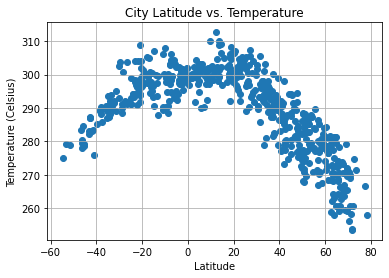

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

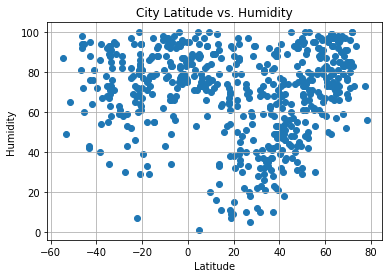

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

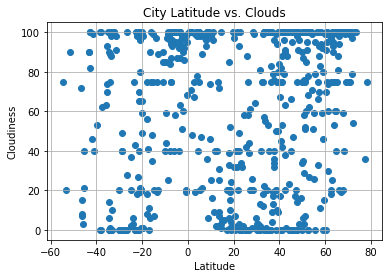

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Clouds")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

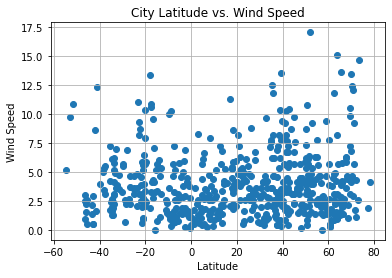

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [15]:
nothern = weather_data.loc[weather_data["lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["lat"] < 0.0]
southern.reset_index(inplace=True)

In [16]:
def plotLinearRegression(xx,yy,label_x,label_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xx, yy)
    print(f"The r-squared is: {rvalue}")
    regress_values = xx * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xx,yy)
    plt.plot(xx,regress_values,"r-")
#     plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8714204310926496


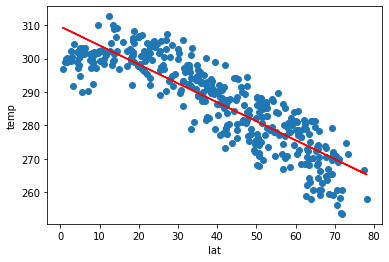

In [17]:
label_x = "lat"
label_y = "temp"
lblpos = (0,25)
plotLinearRegression(nothern[label_x],nothern[label_y],label_x,label_y)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7440297679133824


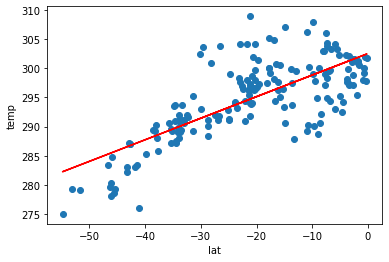

In [18]:
label_x = "lat"
label_y = "temp"
lblpos = (0,25)
plotLinearRegression(southern[label_x],southern[label_y],label_x,label_y)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20536311512490552


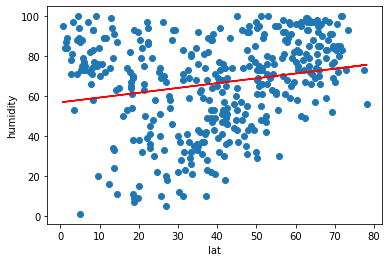

In [21]:
label_x = "lat"
label_y = "humidity"
lblpos = (0,25)
plotLinearRegression(nothern[label_x],nothern[label_y],label_x,label_y)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15122816114042


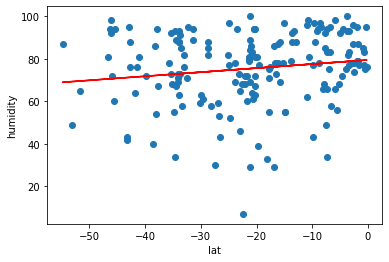

In [22]:
label_x = "lat"
label_y = "humidity"
plotLinearRegression(southern[label_x],southern[label_y],label_x,label_y)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2415809812802036


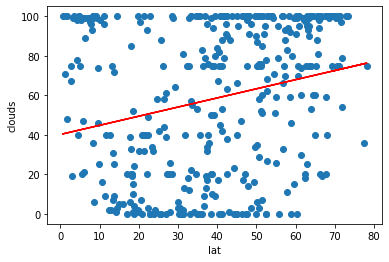

In [23]:
label_x = "lat"
label_y = "clouds"
plotLinearRegression(nothern[label_x],nothern[label_y],label_x,label_y)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29880194122654785


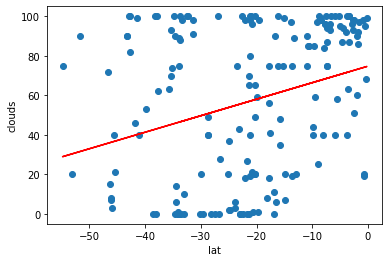

In [24]:
label_x = "lat"
label_y = "clouds"
plotLinearRegression(southern[label_x],southern[label_y],label_x,label_y)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14379089768742487


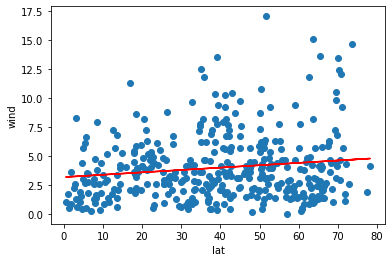

In [25]:
label_x = "lat"
label_y = "wind"
plotLinearRegression(nothern[label_x],nothern[label_y],label_x,label_y)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1552338677180148


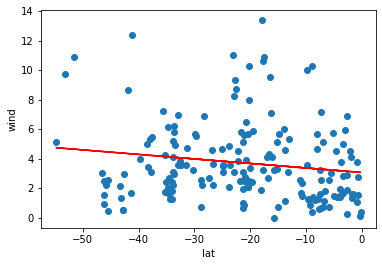

In [26]:
label_x = "lat"
label_y = "wind"
plotLinearRegression(southern[label_x],southern[label_y],label_x,label_y)